In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
%config InlineBackend.figure_format='retina'
from zipfile import ZipFile
from urllib.request import urlopen
from io import BytesIO

# Loading the CSV

In [2]:
url = urlopen("https://s3.amazonaws.com/assignment3datasets/OnlineNewsPopularity.zip")
f = ZipFile(BytesIO(url.read()))
for item in f.namelist():
    print("File in zip: "+  item)
# find the first matching csv file in the zip:
match = [s for s in f.namelist() if ".csv" in s][0]

df = pd.read_csv(f.open(match), low_memory=False)

File in zip: OnlineNewsPopularity/
File in zip: OnlineNewsPopularity/OnlineNewsPopularity.names
File in zip: OnlineNewsPopularity/OnlineNewsPopularity.csv


# Removing the white space from the start of columns

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.shares.median()

1400.0

### Firstly, we need to determine the appropriate threshold for number of shares to discriminate the news to be popular or unpopular. So we  found the median of the target attribute "shares" above which  is 1,400, thus it is reasonable if we take 1,400 as a threshold. Then we can use this threshold to convert the continuous number target attribute into a boolean label.

# Finding the popularity of article according to the day of week

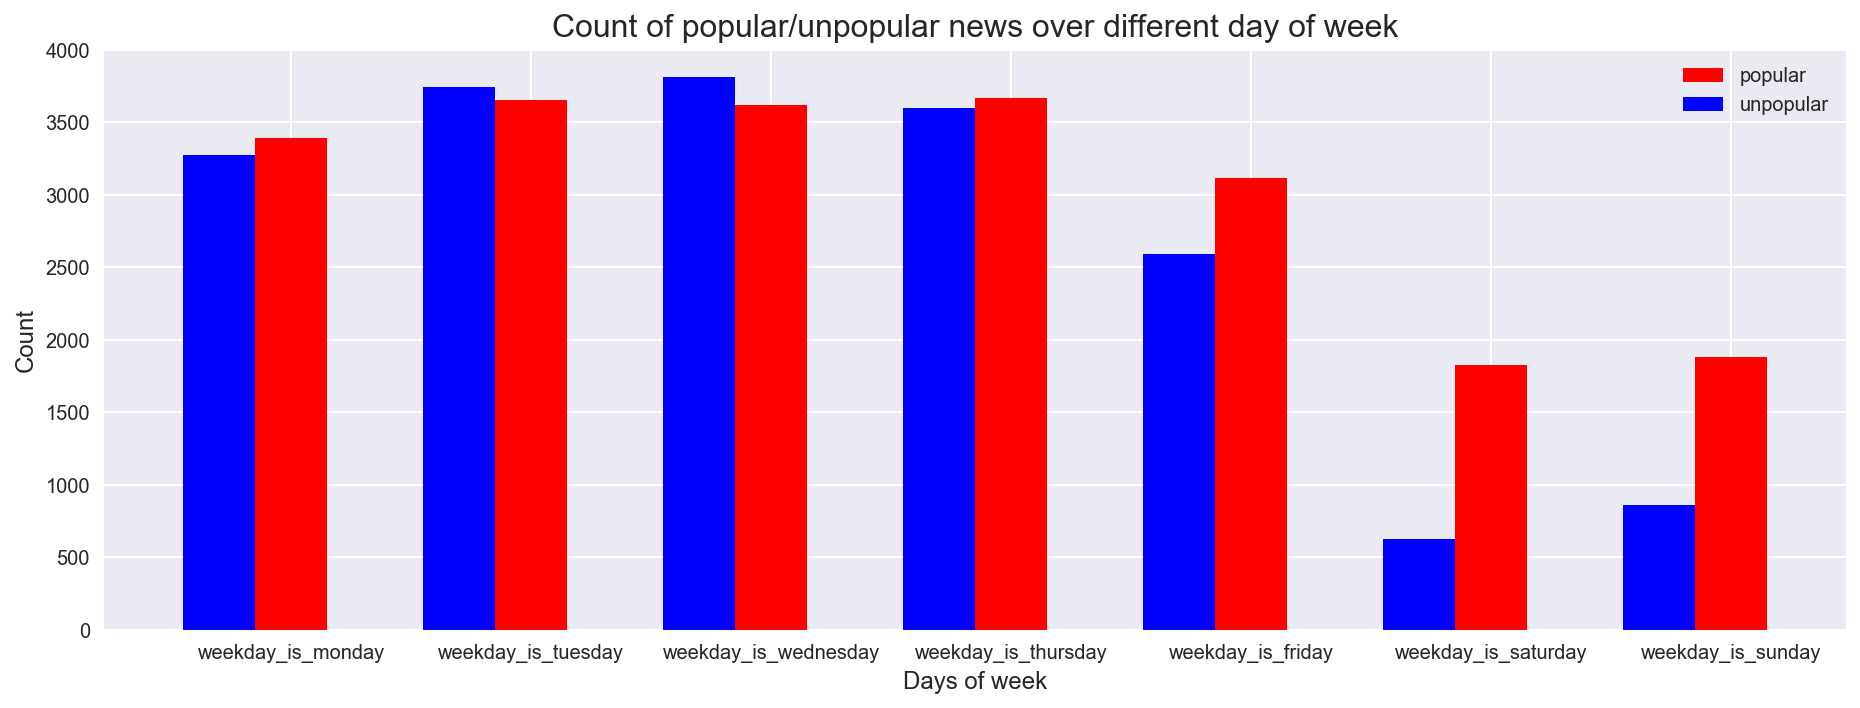

In [7]:
# Visualize the feature of different day of week
columns_day = features_raw.columns.values[29:36]
unpop=df[df['shares']<1400]
pop=df[df['shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

import matplotlib.pyplot as pl
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different day of week", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Count", fontsize = 12)
pl.xlabel("Days of week", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()

# Result:

### In above graph, the count of popular/unpopular news over different day of the week is plotted. We can clearly find that the articles published over the weekends has larger potential to be popular. It makes sense because it is very likely that people will spend more time online browsing the news over the weekends.

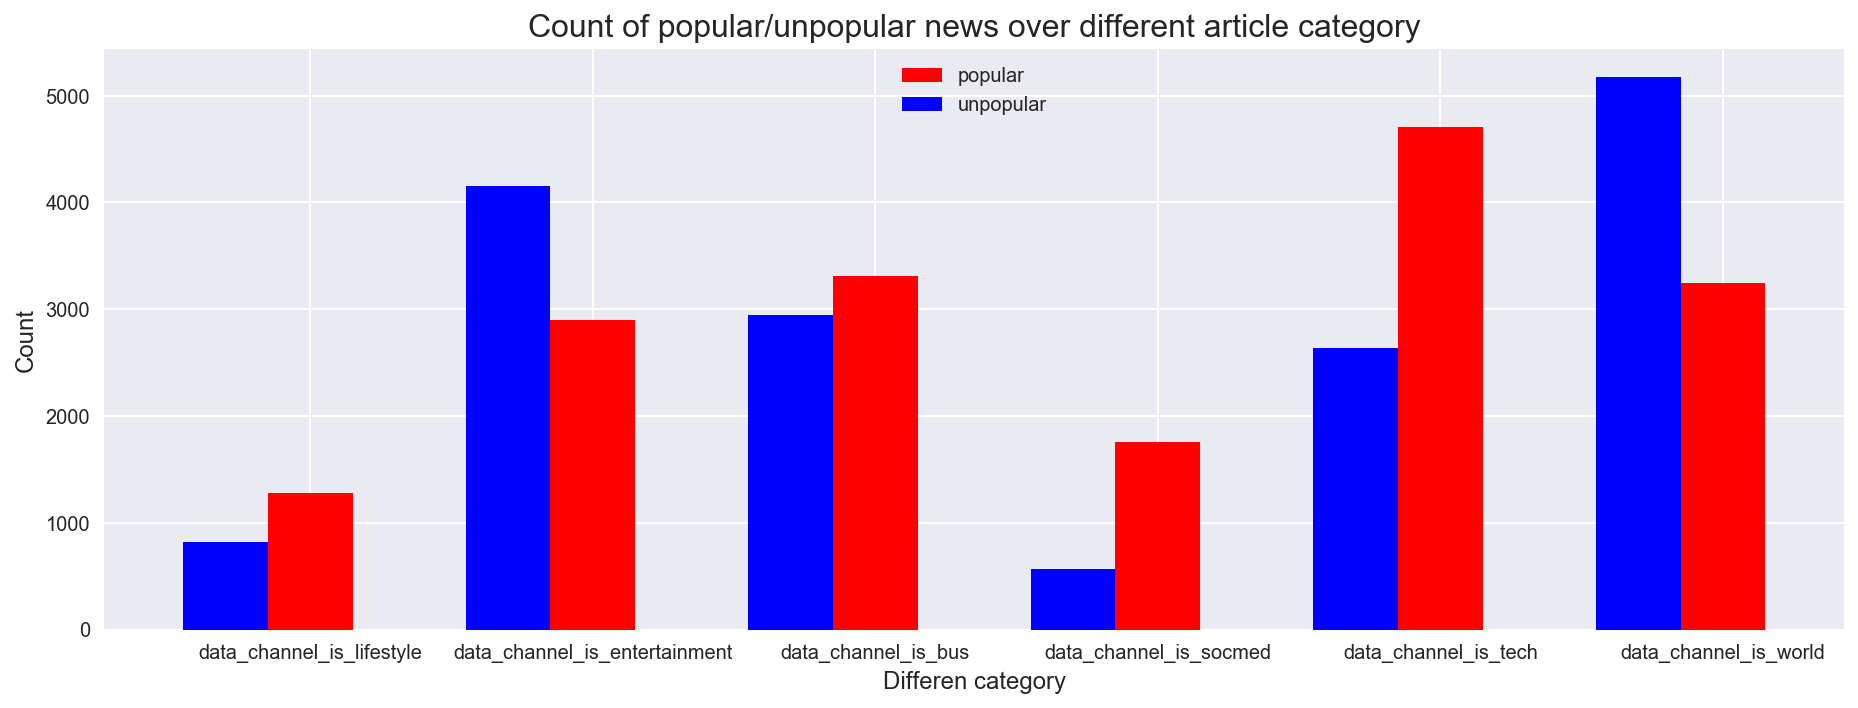

In [8]:
# Visualize the feature of different article category
columns_chan=features_raw.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different article category", fontsize = 16)
pl.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'r', \
          label = "popular")
pl.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_chan)), columns_chan)

pl.ylabel("Count", fontsize = 12)
pl.xlabel("Differen category", fontsize = 12)
    
pl.legend(loc = 'upper center')
pl.tight_layout()
pl.savefig("chan.pdf")
pl.show()

# Result:

### We can observe that in category of technology ("data channel is tech") and social media ("data channel is socmed"),the proportion of popular news is much larger than unpopular ones, and in category of world("data channel is world") and entertainment ("data channel is entertainment"), the proportion of unpopular news is larger than popular ones. This might reflects that the readers of "Mashable.com" prefer the channel of technology and social media much over the channel of world and entertainment.
